In [2]:
import cv2
import numpy as  np
import matplotlib.pyplot as plt

In [3]:
### File directory
datadir = './data/trainingData'
trainingFace = '/face/' #184
trainingBackground = '/background/' #249
### Parameters
# nDim = 900 #number of bins for the color likelihood distribution. This is too big. Try to have smaller bins such as 8, 16, 32, etc.

20
15


(-0.5, 14.5, 19.5, -0.5)

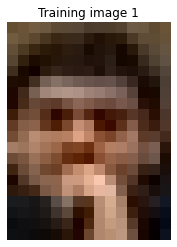

In [7]:

o = cv2.imread('./data/trainingData/face/001.jpg')
nrows, ncols = o.shape[0], o.shape[1]

plt.imshow(cv2.cvtColor(o, cv2.COLOR_BGR2RGB))
plt.title('Training image 1')
plt.axis("off")

[ 47  78 101]
[ 55  83 107]
[ 66  93 114]
[ 63  88 108]
[52 74 92]
[55 73 90]
[55 71 88]
[44 59 75]
[46 61 77]
[45 61 77]
[48 66 83]
[ 70  90 108]
[ 64  88 106]
[49 74 94]
[ 55  84 105]
[ 63  92 113]
[ 56  83 104]
[47 72 92]
[32 54 72]
[19 39 57]
[26 42 59]
[27 42 58]
[13 26 42]
[ 4 17 33]
[ 9 24 40]
[12 28 44]
[39 57 74]
[54 76 94]
[52 76 94]
[ 57  82 102]
[55 79 99]
[34 58 76]
[16 38 56]
[ 8 26 43]
[ 6 22 39]
[16 29 45]
[16 27 41]
[ 0 10 24]
[10 19 33]
[13 24 38]
[ 0  8 22]
[ 9 24 40]
[41 57 73]
[55 73 90]
[ 64  84 101]
[49 69 86]
[14 32 49]
[ 0 11 28]
[ 2 17 33]
[10 23 39]
[15 26 40]
[16 25 39]
[10 17 32]
[12 19 34]
[22 30 43]
[ 0  7 20]
[ 0 10 24]
[28 41 55]
[50 66 79]
[66 82 95]
[30 46 63]
[ 0  8 25]
[ 0  0 18]
[14 27 43]
[26 36 53]
[21 29 46]
[18 26 43]
[21 28 45]
[ 8 15 30]
[25 32 47]
[12 19 34]
[ 8 16 29]
[18 27 40]
[35 47 59]
[58 70 82]
[ 0 13 30]
[ 0 11 30]
[33 47 66]
[ 85  96 116]
[101 112 132]
[ 92 101 121]
[ 81  90 110]
[ 77  84 104]
[ 73  80 100]
[ 76  82 101]
[58 65 82]


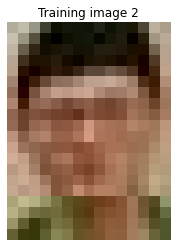

In [5]:
Pr_x_given_y_equalsTo_1 = np.zeros((900,184)) #likelihood for the face class\
Pr_x_given_y_equalsTo_0 = np.zeros((900,249)) #likelihood for the background class

# face
for i in range(184):

    origIm = cv2.imread(datadir + trainingFace + "{0:03}".format(i+1) + '.jpg')
    nrows, ncols = origIm.shape[0], origIm.shape[1]
    
    plt.imshow(cv2.cvtColor(origIm, cv2.COLOR_BGR2RGB))
    plt.title('Training image 2')
    plt.axis("off")
    for x in range(nrows):
        for y in range(ncols):
            r = origIm[x,y][0]
            g = origIm[x,y][1]
            b = origIm[x,y][2]
            Pr_x_given_y_equalsTo_1[x*ncols+y, i] = r
            Pr_x_given_y_equalsTo_1[x*ncols+y+300, i] = g
            Pr_x_given_y_equalsTo_1[x*ncols+y+600, i] = b
            
# background
for i in range(249):

    origIm = cv2.imread(datadir + trainingBackground + "{0:03}".format(i+1) + '.jpg')
    nrows, ncols = origIm.shape[0], origIm.shape[1]

    for x in range(nrows):
        for y in range(ncols):
            r = origIm[x,y][0]
            g = origIm[x,y][1]
            b = origIm[x,y][2]
            Pr_x_given_y_equalsTo_0[x*ncols+y, i] = r
            Pr_x_given_y_equalsTo_0[x*ncols+y+300, i] = g
            Pr_x_given_y_equalsTo_0[x*ncols+y+600, i] = b

In [7]:
# Face
Pr_x_given_y_equalsTo_1_mu = np.average(Pr_x_given_y_equalsTo_1,axis=1) 
Pr_x_given_y_equalsTo_1_var = np.var(Pr_x_given_y_equalsTo_1, axis=1)

In [8]:
Pr_x_given_y_equalsTo_1_dia = np.diag(Pr_x_given_y_equalsTo_1_var)

In [9]:
# Background
Pr_x_given_y_equalsTo_0_mu = np.average(Pr_x_given_y_equalsTo_0,axis=1) 
Pr_x_given_y_equalsTo_0_var = np.var(Pr_x_given_y_equalsTo_0, axis=1)

In [10]:
Pr_x_given_y_equalsTo_0_dia = np.diag(Pr_x_given_y_equalsTo_0_var)

In [11]:
## Testing
datadir = './data/testingData'
testingFace = '/face/' #232
testingBackground = '/background/' #564

def norm(x,u,o):
    first = -0.5*np.sum(np.log(o))
    second = np.sum(np.divide(np.power(np.subtract(x,u),2),2*o))
    return first - second

Pr_x_given_y_equalsTo_1_result = np.zeros(232)

# face
for i in range(232):

    origIm = cv2.imread(datadir + testingFace + "{0:03}".format(i+1) + '.jpg')
    nrows, ncols = origIm.shape[0], origIm.shape[1]
    
    Pr_x_given_y_equalsTo_test = np.zeros(900)
    
    for x in range(nrows):
        for y in range(ncols):
            r = origIm[x,y][0]
            g = origIm[x,y][1]
            b = origIm[x,y][2]
            Pr_x_given_y_equalsTo_test[x*ncols+y] = r
            Pr_x_given_y_equalsTo_test[x*ncols+y+300] = g
            Pr_x_given_y_equalsTo_test[x*ncols+y+600] = b
            
    if norm(Pr_x_given_y_equalsTo_test,Pr_x_given_y_equalsTo_1_mu,Pr_x_given_y_equalsTo_1_var) > norm(Pr_x_given_y_equalsTo_test,Pr_x_given_y_equalsTo_0_mu,Pr_x_given_y_equalsTo_0_var):
        Pr_x_given_y_equalsTo_1_result[i] = 1
    else:
        Pr_x_given_y_equalsTo_1_result[i] = 0

Pr_x_given_y_equalsTo_0_result = np.zeros(564)

# background
for i in range(564):

    origIm = cv2.imread(datadir + testingBackground + "{0:03}".format(i+1) + '.jpg')
    nrows, ncols = origIm.shape[0], origIm.shape[1]
    
    Pr_x_given_y_equalsTo_test = np.zeros(900)
    
    for x in range(nrows):
        for y in range(ncols):
            r = origIm[x,y][0]
            g = origIm[x,y][1]
            b = origIm[x,y][2]
            Pr_x_given_y_equalsTo_test[x*ncols+y] = r
            Pr_x_given_y_equalsTo_test[x*ncols+y+300] = g
            Pr_x_given_y_equalsTo_test[x*ncols+y+600] = b
            
    if norm(Pr_x_given_y_equalsTo_test,Pr_x_given_y_equalsTo_1_mu,Pr_x_given_y_equalsTo_1_var) > norm(Pr_x_given_y_equalsTo_test,Pr_x_given_y_equalsTo_0_mu,Pr_x_given_y_equalsTo_0_var):
        Pr_x_given_y_equalsTo_0_result[i] = 1
    else:
        Pr_x_given_y_equalsTo_0_result[i] = 0


In [12]:
Pr_x_given_y_equalsTo_1_result

array([1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [13]:
Pr_x_given_y_equalsTo_0_result

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0.

In [14]:
np.count_nonzero(Pr_x_given_y_equalsTo_1_result == 1)/232

0.8232758620689655

In [15]:
np.count_nonzero(Pr_x_given_y_equalsTo_0_result == 0)/564

0.7464539007092199